<a href="https://colab.research.google.com/github/kishan038/Book-Recommendation-System/blob/main/Kishan_Chauhan_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Recommendation systems is used for the purpose of suggesting items to purchase or to see. They direct users towards those items which can meet their needs through cutting down large databse of information. A various techniques have been intoduced for recommending items i.e. content, collaborative and hybrid techniques are used. 

As we have three different datasets namely books which contains information about the books, ratings and users.For EDA i have analysed the top authors who got most ratings, top authors on basis of number of books

Recommendation Aproaches:
Collaborative Filtering: in collaborative filtering we make predictions of the taste or the intrests of the user based on the similar users behaviour.
Collaborative filtering has mainly two implementaion stragies
1. Memory based
memory base filtering has user based collaborative filtering, item based collaborative filtering
2. Model based
Model base has Singular value decomposition, Non-Negative Matrix Factorisation(NMF)


Content Based Filtering:

It is type of recommendation system which depends upon the data which we got from customers, based on the data a user profile is generated.




# **GitHub Link -**

https://github.com/kishan038/Book-Recommendation-System

# **Problem Statement**


During the last few decades, with the rise of youtube, amazon,nextlix and many other such web series, recommender system have taken more place in our lives. From e commerce to online advertisement, recommender systems are today unavoidable in our daily online journeys.

In a general way,recommender systems are algorithms aimed at suggesting relevant items to users. Recommender systems are really critical in some indiustries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626486 sha256=78074e5b69cca38d5754825ce9539c1ad59e3e523a73988166ec3c5283bf87b9
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")
from surprise import Dataset, Reader
import requests
import random
import scipy
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV


### Dataset Loading

In [3]:
# Load Dataset
df_books=pd.read_csv("/content/drive/MyDrive/Capstone Project-4/Books.csv")

In [4]:
df_ratings=pd.read_csv("/content/drive/MyDrive/Capstone Project-4/Ratings.csv")

In [5]:
df_users=pd.read_csv("/content/drive/MyDrive/Capstone Project-4/Users.csv")

### Dataset First View

In [6]:
# Dataset First Look
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
df_books.shape


(271360, 8)

In [10]:
df_ratings.shape

(1149780, 3)

In [11]:
df_users.shape

(278858, 3)

### Dataset Information

In [12]:
# Dataset Info
df_books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [13]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [14]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
len(df_books[df_books.duplicated()])

0

In [16]:
len(df_ratings[df_ratings.duplicated()])

0

In [17]:
len(df_users[df_users.duplicated()])

0

#### Missing Values/Null Values

In [18]:
# Missing Values/Null Values Count
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [19]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [20]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

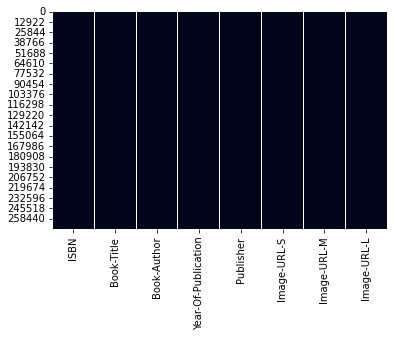

In [21]:
# Visualizing the missing values

#null value visualization in book dataset

sns.heatmap(df_books.isnull(),cbar=False)

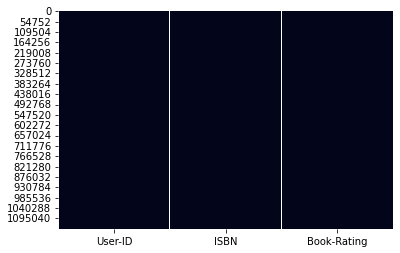

In [22]:
#null value visualization in rating dataset

sns.heatmap(df_ratings.isnull(),cbar=False)

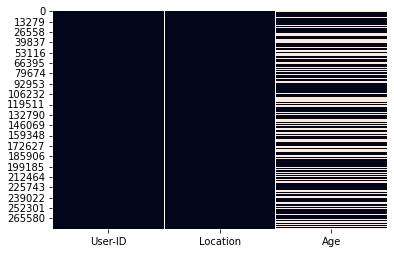

In [23]:
#null value visualization in user dataset

sns.heatmap(df_users.isnull(),cbar=False)

### What did you know about your dataset?

Dataset has 271360 rows and 8 colummns

Rating dataset has 1149780 rows and 3 features

User dataset contains 278858 rows and 3 columns

there are no duplicate values in any of dataset 

Only "Age" variable contains almost most of missing values

## ***2. Understanding Your Variables***

In [24]:
# Dataset Columns
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [25]:
df_ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [26]:
df_users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [27]:
# Dataset Describe
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [28]:
df_ratings.describe(include="all")

,User-ID,ISBN,Book-Rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [29]:
df_users.describe(include="all")

,User-ID,Location,Age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


### Variables Description 

Books dataset -  Book Dataset has following features



*   ISBN: International Standard Book Number

*   Book_Title: Title of the book

*   Book-Author: Author of the book

*   Year-Of-Publication: Year in which book published


*   Publisher : Pubklisher name of the book


*   Image-URL-S: Image URL  link

*   Image-URL-M: Image URL  link

*   Image-URL-L: Image URL  link









Ratings Dataset - ratings dataset has three columns,


*   User-ID: ID of user

*   ISBN: International Standard Book Number

*   Book_Rating: Ratings of books



User Dataset - User Dataset has following three features




*   User-ID: ID of the user

  
*   Location: Location of the user


*   Age: age of user





### Check Unique Values for each variable.

In [30]:
# Check Unique Values for each variable.
df_books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [31]:
df_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [32]:
df_users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [33]:
# Write your code to make your dataset analysis ready.
# merging rating to books

df_books_ratings=df_books.merge(df_ratings, on="ISBN")
df_books_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [34]:
df_books_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


### What all manipulations have you done and insights you found?

Merging of user dataset to book dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Barplpot on Book title

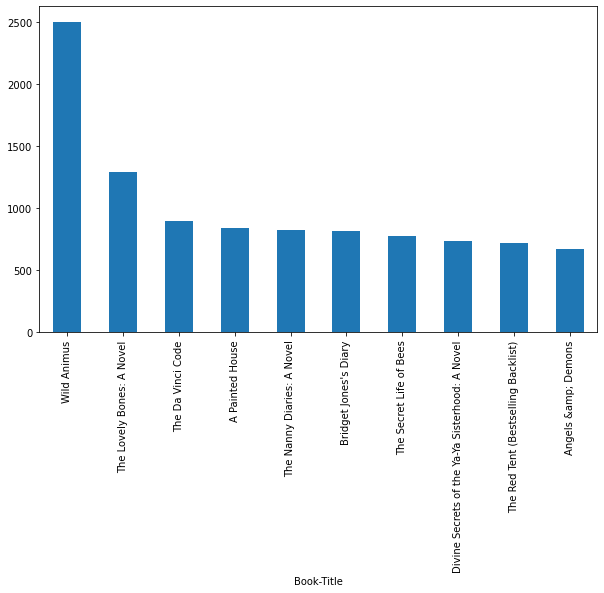

In [35]:
# Chart - 1 visualization code

#Top 10 higest rated books

plt.figure(figsize=(10,6))
df_books_ratings.groupby(["Book-Title"])["Book-Rating"].count().sort_values(ascending=False).head(10).plot(kind="bar")

##### 1. Why did you pick the specific chart?

to get higest rated books

##### 2. What is/are the insight(s) found from the chart?

Wild animals is most famous book followed by a novel

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 Countplot on book author

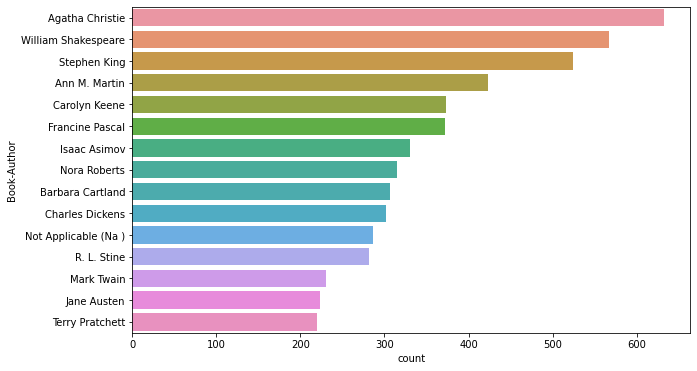

In [36]:
# Chart - 2 visualization code

plt.figure(figsize=(10,6))
sns.countplot(y="Book-Author", data=df_books,order=df_books["Book-Author"].value_counts().index[0:15])


##### 1. Why did you pick the specific chart?

to get top 15 author

##### 2. What is/are the insight(s) found from the chart?

As we can see from above graph Agatha Christie is top author followed by william shakespeare

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 Countplot on publisher

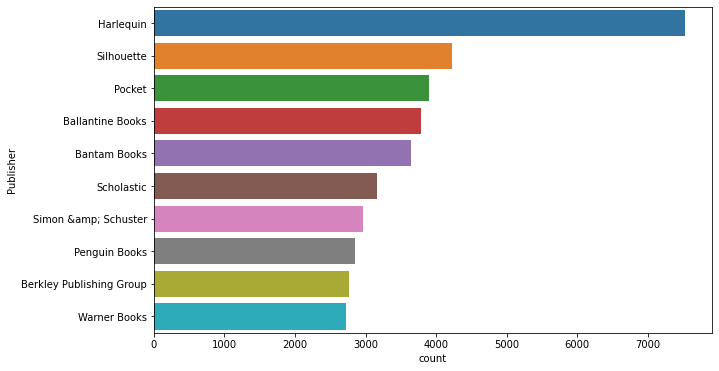

In [37]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
sns.countplot(y="Publisher", data=df_books,order=df_books["Publisher"].value_counts().index[0:10])

##### 1. Why did you pick the specific chart?

getting most rating od publisher

##### 2. What is/are the insight(s) found from the chart?

As we can see from graph most books were published by Harlequin followed by Silhoute then pocket

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4- Ratings

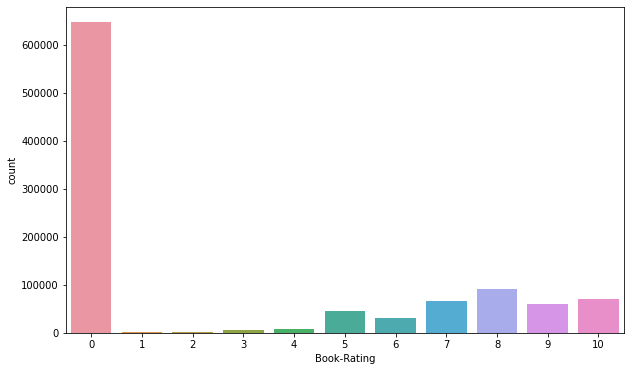

In [38]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
sns.countplot(df_books_ratings["Book-Rating"])

##### 1. Why did you pick the specific chart?

to check ratings of book

##### 2. What is/are the insight(s) found from the chart?

as we can see from graph most book gost zero ratings

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Countplot on user location

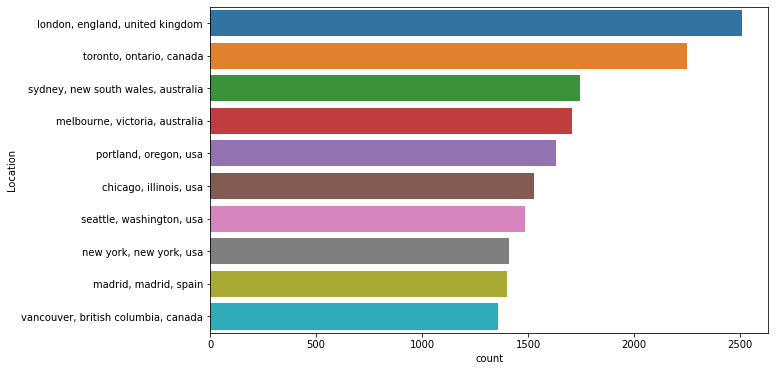

In [39]:
# Chart - 5 visualization code
plt.figure(figsize=(10,6))
sns.countplot(y="Location", data=df_users,order=pd.value_counts(df_users["Location"]).iloc[:10].index)

##### 1. Why did you pick the specific chart?

To get location of users

##### 2. What is/are the insight(s) found from the chart?

As we can see from graph london , england, united kingdom tops the list

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [40]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [41]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [42]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

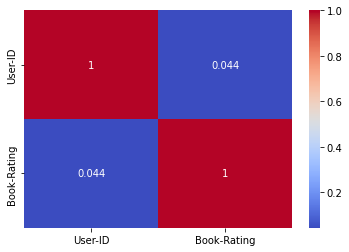

In [43]:
# Correlation Heatmap visualization code
correlation=df_books_ratings.corr()
sns.heatmap(abs(correlation),cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

to study relationship between features

##### 2. What is/are the insight(s) found from the chart?

As we can see from the above heatmap User-ID and Book-Rating are not coorelated

#### Chart - 15 - Pair Plot 

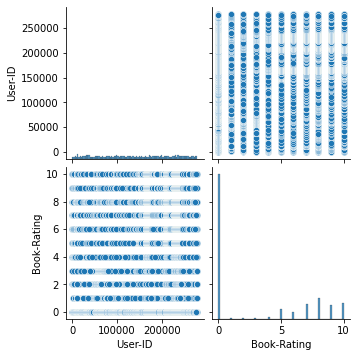

In [44]:
# Pair Plot visualization code
sns.pairplot(df_books_ratings)

##### 1. Why did you pick the specific chart?

To study insight correlation between features

##### 2. What is/are the insight(s) found from the chart?

As we can see from the pairplot User-ID and Book-Rating dont have relation

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [48]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [49]:
# Handling Outliers & Outlier treatments

#filling null values pf the age columns of user

df_users["Age"].fillna(df_users.Age.median(), inplace=True)

In [50]:
plt.figure(figsize=(7,4))

<Figure size 504x288 with 0 Axes>

<Figure size 504x288 with 0 Axes>

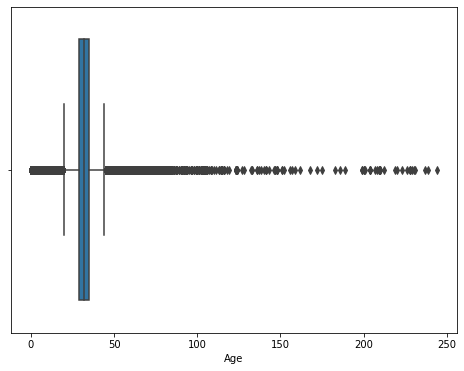

In [51]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Age",data=df_users)

In [52]:
# handling outliers and outliers treatments
Q3,Q1=np.percentile(df_users["Age"],[75,25])
#calculating inner quartilr range
IQR=Q3-Q1
#fixing boundaries 
max=Q3+(1.5*IQR)
min=Q1-(1.5*IQR)
df_users["Age"]=np.where(df_users["Age"]>max,max,df_users["Age"])
df_users["Age"]=np.where(df_users["Age"]<min,min,df_users["Age"])

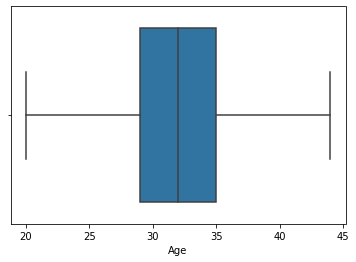

In [53]:
#checking outliers again
sns.boxplot(x="Age",data=df_users)

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

IQR method used to fill the right side outliers with maximum value calculated from IQR and left side outliers with maximum value calculated from IQR

In [54]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [55]:
# Expand Contraction

#### 2. Lower Casing

In [56]:
# Lower Casing

#### 3. Removing Punctuations

In [57]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [58]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [59]:
# Remove Stopwords

In [60]:
# Remove White spaces

#### 6. Rephrase Text

In [61]:
# Rephrase Text

#### 7. Tokenization

In [62]:
# Tokenization

#### 8. Text Normalization

In [63]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [64]:
# POS Taging

#### 10. Text Vectorization

In [65]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [67]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [68]:
# Transform Your data

### 6. Data Scaling

In [69]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [70]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [72]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

# **Popularity Based Recommender System**

In [73]:
num_rate=df_books_ratings.groupby("Book-Title").count()["Book-Rating"].reset_index()

In [74]:
num_rate

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [75]:
num_rate.rename(columns={"Book-Rating":"Number_ratings"},inplace=True)

In [76]:
num_rate

,Book-Title,Number_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [77]:
avg_rate=round(df_books_ratings.groupby("Book-Title").mean()["Book-Rating"].reset_index(),1)
avg_rate.rename(columns={"Book-Rating":"avg_rating"},inplace=True)
avg_rate

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.2
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
4,Beyond IBM: Leadership Marketing and Finance ...,0.0
...,...,...
241066,Ã?Â?lpiraten.,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,5.2
241068,Ã?Â?sterlich leben.,7.0
241069,Ã?Â?stlich der Berge.,2.7


In [78]:
popular_df=num_rate.merge(avg_rate, on="Book-Title")
popular_df

,Book-Title,Number_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.2
1,Always Have Popsicles,1,0.0
2,Apple Magic (The Collector's series),1,0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.0
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.2
241068,Ã?Â?sterlich leben.,1,7.0
241069,Ã?Â?stlich der Berge.,3,2.7


In [79]:
popular_df=popular_df[popular_df["Number_ratings"]>=250].sort_values("avg_rating",ascending=False)

In [80]:
popular_df=popular_df.merge(df_books, on="Book-Title").drop_duplicates("Book-Title")[["Book-Title","Book-Author","Image-URL-M","Number_ratings","avg_rating"]]

In [81]:
popular_df=popular_df.head(50)

In [82]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Number_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.9
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.8
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.7
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.5
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.2
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.0
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.9
26,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.9
37,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.9
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.7


# **Collaborative Filtering Based Recommender System**

In [83]:
x=df_books_ratings.groupby("User-ID").count()["Book-Rating"]>200
user_know=x[x].index

In [84]:
filterd_rating=df_books_ratings[df_books_ratings["User-ID"].isin(user_know)]

In [85]:
y=filterd_rating.groupby("Book-Title").count()["Book-Rating"]>=50
famous_books=y[y].index

In [86]:
final_ratings=filterd_rating[filterd_rating["Book-Title"].isin(famous_books)]

In [87]:
pt=final_ratings.pivot_table(index="Book-Title",columns="User-ID",values="Book-Rating")

In [88]:
pt.fillna(0,inplace=True)

In [89]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
from sklearn.metrics.pairwise import cosine_similarity

In [91]:
similarity_score= cosine_similarity(pt)

In [92]:
similarity_score.shape

(706, 706)

In [93]:
def recommend(book_name):
  #index fetching
  index=np.where(pt.index==book_name)[0][0]
  similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1], reverse=True)[1:5]

  data=[]
  for i in similar_items:
     item=[]
     temp_df=df_books[df_books["Book-Title"]==pt.index[i[0]]]
     item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Title"].values))
     item.extend(list(temp_df.drop_duplicates("Book-Title")["Book-Author"].values))
     item.extend(list(temp_df.drop_duplicates("Book-Title")["Image-URL-M"].values))

     data.append(item)
  return data

In [94]:
recommend("1984")

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg']]

In [95]:
pt.index[54]

'At Home in Mitford (The Mitford Years)'

In [96]:
import pickle 
pickle.dump(popular_df,open("popular.pkl","wb"))

In [97]:
df_books.drop_duplicates("Book-Title")

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...,http://images.amazon.com/images/P/0449906736.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [98]:
pickle.dump(pt,open("pt.pkl","wb"))
pickle.dump(df_books,open("df_books.pkl","wb"))
pickle.dump(similarity_score,open("similarity_scores.pkl","wb"))

In [99]:
popular_df

,Book-Title,Book-Author,Image-URL-M,Number_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.9
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.8
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.7
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.5
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.2
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.0
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.9
26,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.9
37,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.9
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.7


## ***7. ML Model Implementation***

In [100]:
#only valid ratings
df_ratings=df_ratings[df_ratings["Book-Rating"]!=0]

#merging dataset
df_merge=pd.merge(df_users,df_ratings,on="User-ID")
df_merge=pd.merge(df_merge,df_books, on="ISBN")

In [101]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383842 non-null  int64  
 1   Location             383842 non-null  object 
 2   Age                  383842 non-null  float64
 3   ISBN                 383842 non-null  object 
 4   Book-Rating          383842 non-null  int64  
 5   Book-Title           383842 non-null  object 
 6   Book-Author          383841 non-null  object 
 7   Year-Of-Publication  383842 non-null  object 
 8   Publisher            383840 non-null  object 
 9   Image-URL-S          383842 non-null  object 
 10  Image-URL-M          383842 non-null  object 
 11  Image-URL-L          383841 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 38.1+ MB


In [102]:
#dropping irrelevant columns
df_merge.drop(["Image-URL-S","Image-URL-M","Image-URL-L"], axis=1, inplace=True)

In [103]:
#Checking null values

df_merge.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [104]:
from surprise import Dataset, Reader

In [105]:
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

### ML Model - 1 Implementation of SVD and NMF

In [106]:
# ML Model - 1 Implementation

reader=Reader(rating_scale=(1,10))
data=Dataset.load_from_df(df_merge[["User-ID","ISBN","Book-Rating"]],reader)
# Fit the Algorithm
svd_default=SVD()
results_svd=cross_validate(svd_default,data, cv=3)
pd.DataFrame(results_svd).mean()
# Predict on the model

test_rmse    1.643744
test_mae     1.269768
fit_time     6.762468
test_time    1.397559
dtype: float64

In [107]:
#implementation of NMF
nmf=NMF()
results_nmf=cross_validate(nmf,data, cv=3)
pd.DataFrame(results_nmf).mean()

test_rmse     2.473809
test_mae      2.055165
fit_time     20.283518
test_time     1.551192
dtype: float64

#### 2. Cross- Validation & Hyperparameter Tuning

In [108]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from seaborn.axisgrid import Grid
param_grid={"n_factors":[60,50],"n_epochs":[6,15],"lr_all":[0.01,0.001],"reg_all":[0.1,0.9]}
opt_svd=GridSearchCV(SVD, param_grid, measures=["rmse","mae"],cv=3)

# Fit the Algorithm
opt_svd.fit(data)
print(opt_svd.best_score["rmse"])
print(opt_svd.best_params["rmse"])

1.6324269328190082
{'n_factors': 50, 'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.1}


In [109]:
#spiliting in train test
train,test=train_test_split(data,test_size=0.2)
best_params=opt_svd.best_params["rmse"]
optimized_svd=SVD(n_factors=best_params["n_factors"],n_epochs=best_params["n_epochs"],lr_all=best_params["lr_all"],reg_all=best_params["reg_all"])
optimized_svd.fit(train)
pred=optimized_svd.test(test)

In [110]:
results_svd=cross_validate(optimized_svd,data,cv=3)
pd.DataFrame(results_svd).mean()

test_rmse    1.632736
test_mae     1.264628
fit_time     3.909404
test_time    1.610573
dtype: float64

In [111]:
#predicttion

df_pred=pd.DataFrame(pred, columns=["user_id","isbn","actual_rating","pred_rating","details"])
df_pred["impossible"]=df_pred["details"].apply(lambda x : x ["was_impossible"])
df_pred["pred_rating_round"]=df_pred["pred_rating"].round()
df_pred["abs_err"]=abs(df_pred["pred_rating"] - df_pred["actual_rating"])
df_pred.drop(["details"],axis=1, inplace=True)
df_pred.sample(20)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
44178,74687,0385306040,8.0,7.793844,False,8.0,0.206156
29217,268833,0373159595,5.0,6.962041,False,7.0,1.962041
46540,189855,0451520092,7.0,7.873264,False,8.0,0.873264
24178,184629,0671021001,9.0,7.643019,False,8.0,1.356981
43063,38781,0373613792,10.0,9.443216,False,9.0,0.556784
19224,12538,0786808551,9.0,8.630290,False,9.0,0.369710
54630,32122,0446672211,9.0,8.742827,False,9.0,0.257173
30592,92398,038529929X,7.0,8.117165,False,8.0,1.117165
72172,160401,0312113420,7.0,6.314744,False,6.0,0.685256
41369,229409,0553284789,9.0,8.118189,False,8.0,0.881811


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used to check the results for all possible combination of parameters from the param grid

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes test rmse has reduced

# **How Product Can be useful to Stakeholders**

**Book Search recommendation system is needed to reduce the large data output so that book search will be more effective compared to the book search system with syntax method. The book search recommendation system uses a user based collaborative filtering method.**

***Online retailers can also benefit from book recommendation systems by using them to personalize the shopping experience for their customers, by providing personalized recommendation, retailers can increase customers engagement and loyalty, as well as drive sales of both new and older books. ***

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [112]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [113]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Most Common rating given by the user was 8.

Stepehen king is the author who got the maximum number of ratings by the users

most of the books were published by Pocket Silhoutte and hariquinn

Top 10 most rated books were essentially novels. 

Lovely Bone and wild animus were famous book

Most of user belongs to london, England, United Kingdom

SVD model works better than NMF model as it has lower RMSE and MAE score


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***